In [1]:
%load_ext autoreload
%autoreload 2
from netty.netty import Netty
from img_utils import *

c:\program files\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
net = Netty()

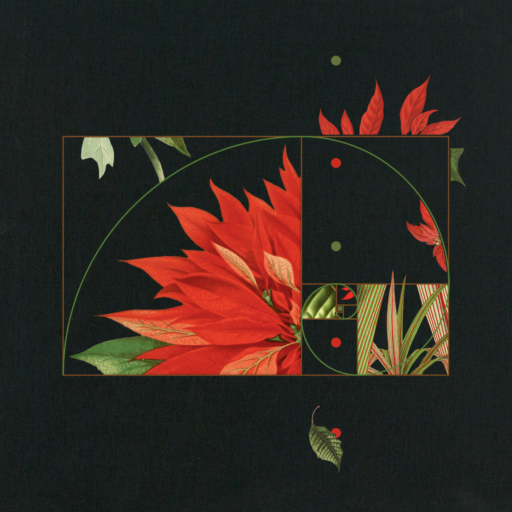

In [12]:
img = imload("data/color1.jpg")
img = imsize(img,(512,512))
imshow(img)

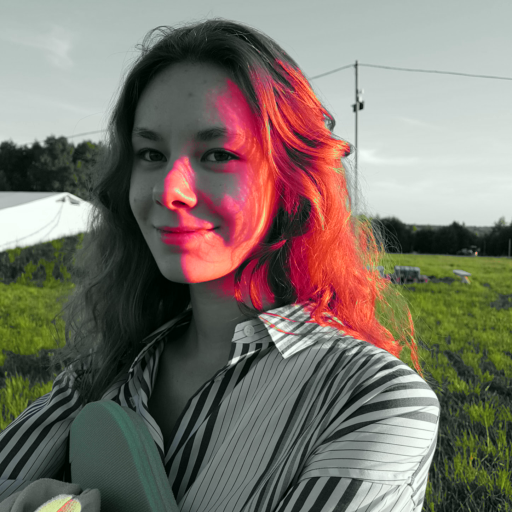

In [13]:
img2 = imload("data/ktk1.jpg")
img2 = imsize(img2,(512,512))
img2 = set_color(img2,img,True,False)
# img2 = histmatch(img2,img)

imshow(img2)

In [ ]:
net.args["size"] = [1024,1024]
net.args["style_layers"] = [1,2,3,3,4,5,6]
net.args["content_w"] = 1e-5
net.args["octaves"] = 3
net.build()
net.set_tgs([img2, img])
net.set_x0("content")
net.args["iters"] = 30
x = net.render()

In [ ]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
# root.withdraw()

file_path = filedialog.askopenfilename()